In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
# Question 4.1:
df = pd.read_csv("Ratings_Dataset_v2.csv") # for the grader - my CSV is in the same folder as the notebook
df.head()

,user_id,item_id,rating
0,1,536,5.0
1,1,152,5.0
2,1,540,1.0
3,1,501,5.0
4,1,132,4.0


In [13]:
u_i_matrix = pd.pivot_table(df, values='rating', index=['user_id'],columns=['item_id'])
filled_matrix = u_i_matrix.fillna(0)
filled_matrix
# I used the simple pivot table function from pandas in order to create the ratings matrix, and filled all NaN's with zero.

item_id,101,102,103,104,105,106,107,108,109,110,...,591,592,593,594,595,596,597,598,599,600
user_id,,,,,,,,,,,,,,,,,,,,,
1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,3.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


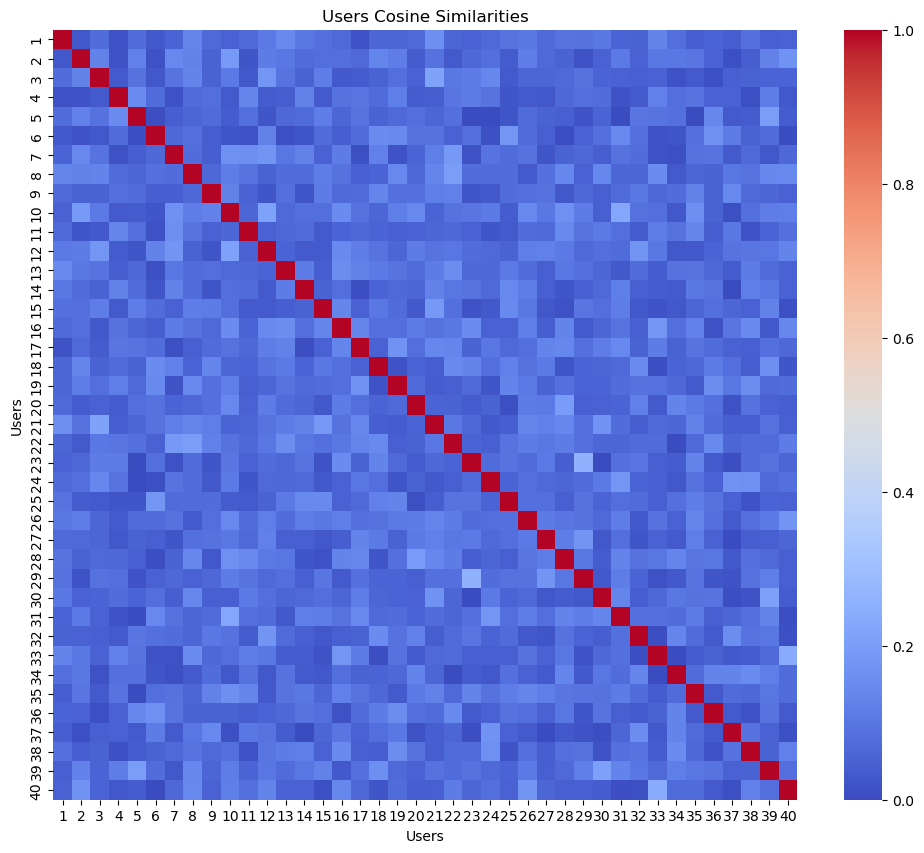

In [14]:
# Question 4.2:
ratings = filled_matrix.to_numpy() # it'll be easier to work with a numpy array for calculations
users = filled_matrix.index
norms = np.sqrt((ratings ** 2).sum(axis=1)) # create a variable for all norms
similarities = pd.DataFrame(index=users, columns=users,dtype=float)

for i in range(ratings.shape[0]):
    for j in range(ratings.shape[0]):
        dot = np.dot(ratings[i], ratings[j])
        norm_i = norms[i]
        norm_j = norms[j]
        if norm_i == 0 or norm_j == 0:
            similarity = 0
        else:
            similarity = dot / (norm_i * norm_j)
        similarities.iloc[i, j] = similarity

partial = similarities.iloc[:40,:40] # a heatmap of 400 users is overwhelming, 10% of it still gets the point
plt.figure(figsize=(12,10))
sns.heatmap(partial, cmap='coolwarm')
plt.title("Users Cosine Similarities")
plt.xlabel("Users")
plt.ylabel("Users")
plt.show()

We can see that most pairs have weak relations with each other, in a 40x40 slice of the data.

In [10]:
similarities

user_id,1,2,3,4,5,6,7,8,9,10,...,391,392,393,394,395,396,397,398,399,400
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.026897,0.074525,0.014906,0.077865,0.028757,0.056997,0.134968,0.067460,0.049761,...,0.105787,0.125857,0.096526,0.031419,0.077038,0.051037,0.085369,0.038058,0.090948,0.030065
2,0.026897,1.000000,0.127777,0.017487,0.124330,0.012049,0.141443,0.125509,0.051208,0.189219,...,0.109208,0.064297,0.033772,0.113031,0.099644,0.000000,0.092136,0.053150,0.170708,0.014108
3,0.074525,0.127777,1.000000,0.034320,0.086708,0.026707,0.090256,0.131968,0.051594,0.105971,...,0.132956,0.039589,0.146784,0.104393,0.066347,0.073730,0.046248,0.041234,0.078831,0.004343
4,0.014906,0.017487,0.034320,1.000000,0.148529,0.073783,0.013896,0.073034,0.081751,0.034444,...,0.006706,0.090073,0.016102,0.061960,0.012521,0.161759,0.028861,0.040207,0.061144,0.146112
5,0.077865,0.124330,0.086708,0.148529,1.000000,0.007557,0.040326,0.060556,0.070565,0.037878,...,0.096003,0.037342,0.020768,0.030825,0.029070,0.052159,0.058629,0.082233,0.073005,0.154859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,0.051037,0.000000,0.073730,0.161759,0.052159,0.069349,0.034362,0.111139,0.064594,0.045517,...,0.056123,0.124829,0.012251,0.045460,0.052399,1.000000,0.024704,0.142035,0.041870,0.120839
397,0.085369,0.092136,0.046248,0.028861,0.058629,0.085507,0.093377,0.121100,0.040337,0.117942,...,0.069639,0.029478,0.145907,0.050693,0.130036,0.024704,1.000000,0.103511,0.030416,0.034927
398,0.038058,0.053150,0.041234,0.040207,0.082233,0.075985,0.096861,0.109935,0.036698,0.063475,...,0.121745,0.060491,0.062644,0.051655,0.093369,0.142035,0.103511,1.000000,0.074763,0.115337


In [15]:
# Question 4.3:
def predict_rating(user_id, item_id, k, similarity_matrix, ratings_matrix):
    """
    Predicts rating for (user,item) using the top k similar users who rated this item.
    takes in account cases where there are no neighbors or when denominator is 0.
    returns a float which represents the prediction.
    """
    # Check if user and item are in the matrix:
    if user_id not in ratings_matrix.index or item_id not in ratings_matrix.columns:
        return 0.0
    user_sim = similarity_matrix.loc[user_id] # Similarities of this user with all others (row)
    item_ratings = ratings_matrix[item_id] # All ratings for the given item (column)
    rated_users = item_ratings[item_ratings > 0].index # Users who rated the item
    rated_users = rated_users[rated_users != user_id] # Remove self user_id from neighbors
    sims = user_sim[rated_users] # Similarity scores only from users who rated the item
    top_k_users = sims.sort_values(ascending=False).head(k) # Take top k similar users
    numerator = 0.0
    denominator = 0.0

    for neighbor_id, sim_score in top_k_users.items():
        neighbor_rating = ratings_matrix.loc[neighbor_id, item_id]
        numerator += sim_score * neighbor_rating
        denominator += abs(sim_score)

    if denominator == 0:
        return 0.0

    return numerator / denominator

MAE for k = 1: 1.5938
MAE for k = 3: 1.3586
MAE for k = 5: 1.3090
MAE for k = 10: 1.2742


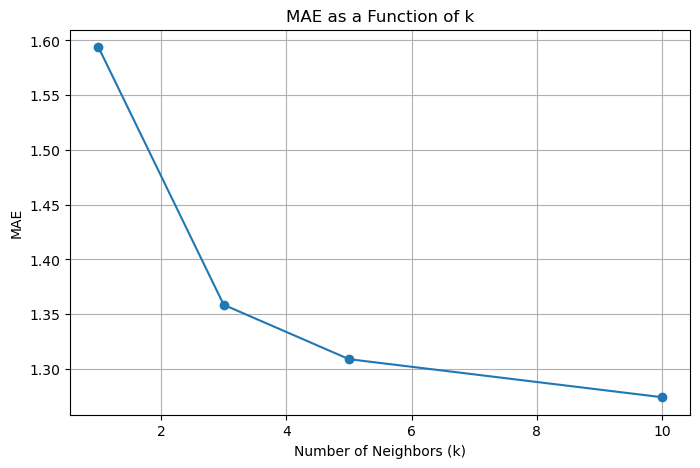

In [16]:
# Question 4.4 + 4.5:
# Convert the matrix into a list of (user_id, item_id, rating):
data = []
for user_id in filled_matrix.index:
    for item_id in filled_matrix.columns:
        rating = filled_matrix.loc[user_id, item_id]
        if rating > 0:
            data.append((user_id, item_id, rating))

ratings_df = pd.DataFrame(data, columns=['user_id', 'item_id', 'rating'])

# Split into train and test sets:
train_df, test_df = train_test_split(ratings_df, test_size=0.2, random_state=42)

# Make a train matrix by zeroing the test entries in the matrix
train_matrix = filled_matrix.copy()
for _, row in test_df.iterrows():
    train_matrix.loc[row['user_id'], row['item_id']] = 0

# calculate cosine similarities using the train matrix
train_ratings = train_matrix.to_numpy()
norms = np.sqrt((train_ratings ** 2).sum(axis=1))
train_similarities = pd.DataFrame(index=train_matrix.index, columns=train_matrix.index, dtype=float)

# Loop again over all user pairs in the train set only
for i in range(train_ratings.shape[0]):
    for j in range(train_ratings.shape[0]):
        dot = np.dot(train_ratings[i], train_ratings[j])
        norm_i = norms[i]
        norm_j = norms[j]
        if norm_i == 0 or norm_j == 0:
            similarity = 0
        else:
            similarity = dot / (norm_i * norm_j)
        train_similarities.iloc[i, j] = similarity

# Define a function to calculate MAE for a given k
def calculate_mae(k, test_df, similarity_matrix, train_matrix):
    # Average |true - prediction| over the test rows
    errors = []
    for _, row in test_df.iterrows():
        user = row['user_id']
        item = row['item_id']
        true_rating = row['rating']
        predicted_rating = predict_rating(user, item, k, similarity_matrix, train_matrix)
        error = abs(true_rating - predicted_rating)
        errors.append(error)
    return np.mean(errors)

# Try different values of k and print the MAE
k_values = [1, 3, 5, 10]
mae_scores = []

for k in k_values:
    mae = calculate_mae(k, test_df, train_similarities, train_matrix)
    mae_scores.append(mae)
    print(f"MAE for k = {k}: {mae:.4f}")

# Plot results:
plt.figure(figsize=(8, 5))
plt.plot(k_values, mae_scores, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("MAE")
plt.title("MAE as a Function of k")
plt.grid(True)
plt.show()

The plot shows that the MAE decreases as the number of neighbors increases.
When using only 1 neighbor the MAE is the highest- probably because predictions are based on a single user and can be very noisy.
As k increases to 3,5,10, the MAE drops - this suggests that using more neighbors helps stabilize the prediction, since we average over more users.
The improvement becomes smaller as k increases - the plot shows that the difference between k=5 and k=10 is smaller than from k=3 to k=5.
It's clear that as k increases - the error decreases, but from some point on (from k=3 by the elbow method) the reduction in error becomes lower as k grows.
To sum up - relying on the elbow method, k=3 is the elbow point which means that from this point on (as k increases) the improvements are smaller. which makes k=3 a good choice.

Adjusted MAE for k = 1: 1.6240
Adjusted MAE for k = 3: 1.3699
Adjusted MAE for k = 5: 1.3181
Adjusted MAE for k = 10: 1.2836


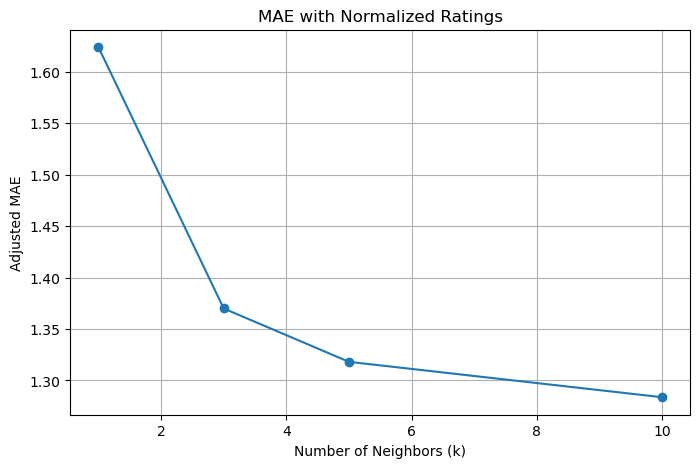

In [18]:
# Question 4.6 - I pretty much copy-pasted from Question 4.3 but with adjustments to the demand of this question, so there are minor changes:
def predict_rating_normalized(user_id, item_id, k, similarity_matrix, ratings_matrix):
    """
    Predicts rating for (user,item) using mean centered ratings and the top k similar users who rated this item.
    for each neighbor it calculates their rating - their avg rating.
    takes in account cases where there are no neighbors or when denominator is 0.
    returns a float which represents the prediction.
    """
    # Check if user or item are missing
    if user_id not in ratings_matrix.index or item_id not in ratings_matrix.columns:
        return 0.0

    user_averages = ratings_matrix.replace(0, np.NaN).mean(axis=1) # Compute each user's average rating - replace 0's with NaN
    # so these values won't be calculated in the mean calculation.
    user_sim = similarity_matrix.loc[user_id] # Similarities of this user with all others (row)
    item_ratings = ratings_matrix[item_id] # All ratings for the given item (column)
    rated_users = item_ratings[item_ratings > 0].index # Users who rated the item
    rated_users = rated_users[rated_users != user_id] # Remove self user_id from neighbors
    sims = user_sim[rated_users] # Similarity scores only from users who rated the item
    top_k_users = sims.sort_values(ascending=False).head(k) # Take top k similar users
    numerator = 0.0
    denominator = 0.0

    for neighbor_id, sim_score in top_k_users.items():
        neighbor_avg = user_averages[neighbor_id]
        neighbor_rating = ratings_matrix.loc[neighbor_id, item_id]
        adjusted_rating = neighbor_rating - neighbor_avg
        numerator += sim_score * adjusted_rating
        denominator += abs(sim_score)

    if denominator == 0:
        return user_averages[user_id]  # fallback: return user's average

    prediction = user_averages[user_id] + (numerator / denominator)
    return prediction

# Create a train matrix by setting test ratings to zero in the original user-item ratings matrix
train_matrix = filled_matrix.copy()
for _, row in test_df.iterrows():
    train_matrix.loc[row['user_id'], row['item_id']] = 0

user_averages = train_matrix.replace(0, np.NaN).mean(axis=1) # Compute each user's average rating - replace 0's with NaN
norm_matrix = train_matrix.copy() # Make a copy of the training matrix
# Subtract the average rating from each user's ratings
for user_id in norm_matrix.index:
    for item_id in norm_matrix.columns:
        rating = norm_matrix.loc[user_id, item_id]
        if rating > 0:
            norm_matrix.loc[user_id, item_id] = rating - user_averages[user_id]
        else:
            norm_matrix.loc[user_id, item_id] = 0

# Calculate similarities using the normalized matrix
norm_ratings = norm_matrix.to_numpy()
norms = np.sqrt((norm_ratings ** 2).sum(axis=1))
adjusted_similarities = pd.DataFrame(index=norm_matrix.index, columns=norm_matrix.index, dtype=float)

# loop over all user pairs and calculate cosine on the mean centered ratings:
for i in range(norm_ratings.shape[0]):
    for j in range(norm_ratings.shape[0]):
        dot = np.dot(norm_ratings[i], norm_ratings[j])
        norm_i = norms[i]
        norm_j = norms[j]
        if norm_i == 0 or norm_j == 0:
            similarity = 0
        else:
            similarity = dot / (norm_i * norm_j)
        adjusted_similarities.iloc[i, j] = similarity

def calculate_mae_adjusted(k, test_df, similarity_matrix, train_matrix):
    errors = []
    for _, row in test_df.iterrows():
        user = row['user_id']
        item = row['item_id']
        true_rating = row['rating']
        predicted_rating = predict_rating_normalized(user, item, k, similarity_matrix, train_matrix)
        error = abs(true_rating - predicted_rating)
        errors.append(error)
    return np.mean(errors)

k_values = [1, 3, 5, 10]
adjusted_mae_scores = []

for k in k_values:
    mae = calculate_mae_adjusted(k, test_df, adjusted_similarities, train_matrix)
    adjusted_mae_scores.append(mae)
    print(f"Adjusted MAE for k = {k}: {mae:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(k_values, adjusted_mae_scores, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Adjusted MAE")
plt.title("MAE with Normalized Ratings")
plt.grid(True)
plt.show()

# this whole code takes a while to run

Explanation for the result:

I thought that normalizing the ratings by subtracting each user's average would make a difference in the predictions.
After testing it, I saw that the results didn’t change much. That makes sense in hindsight because the similarity we use is cosine similarity, and cosine only looks at the angle between users ratings and not the size of the ratings.
Since normalization mostly affects the magnitude by shifting the values and not the direction - it doesnt really change the final similarity. 
So even though I added normalization, it didn’t have much effect because the core calculation which is the angle between users stayed the same.

Question 4.7:

Even though only one rating was deleted (user 4 rating for item 101), this can still affect future predictions for user 4.
First, if the system tries to predict user 4 ratings for item 101 again - it wont have the actual rating anymore, so the prediction might be less accurate. Second, this rating plays a role in calculating similarities between user 4 and other users. If item 101 was one of the only items shared between user 4 and another user, removing it can change the similarity score between them and cause the system to choose different neighbors. This change would affect predictions for other items from the same reason. So even one missing rating can affect the system's ability to recommend accurately, especially when the data is sparse.